In [1]:
import nltk
from nltk import trigrams

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ghora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
corpusdir = '../text_docs/'  # point to the Directory of corpus.
your_corpus = PlaintextCorpusReader(corpusdir, '.*\.txt')

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ghora\AppData\Local\Temp\ipykernel_33632\500354037.py:2: SyntaxWarning: invalid escape sequence '\.'
  your_corpus = PlaintextCorpusReader(corpusdir, '.*\.txt')


In [4]:
def build_trigram_model():
    trigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    #for sentence in gutenberg.sents("austen-emma.txt"):

    for sentence in your_corpus.sents():
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only

        for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
            trigram_model[(w1, w2)][w3] += 1

        for w1_w2 in trigram_model:
            trigram_count_4_w1w2 = float(sum(trigram_model[w1_w2].values()))
            for w3 in trigram_model[w1_w2]:
                trigram_model[w1_w2][w3] /= trigram_count_4_w1w2

    return trigram_model

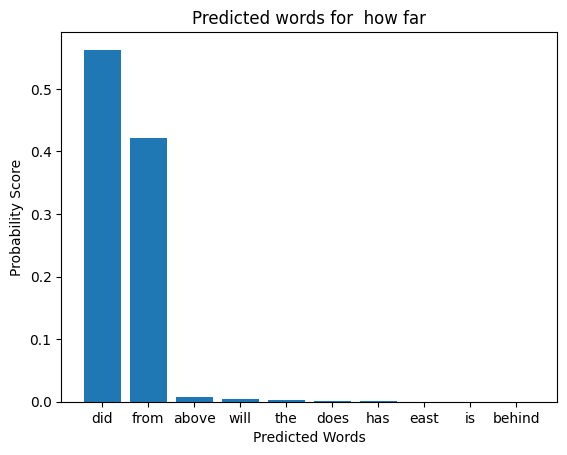

In [5]:
def predict_next_word(w1,w2):
    model = build_trigram_model()
    next_word = model[(w1,w2)]
    predicted_words = Counter(next_word).most_common(10)


    top10Predicted_words = list(zip(*predicted_words))[0]
    probability_score = list(zip(*predicted_words))[1]
    x_pos = np.arange(len(top10Predicted_words))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, top10Predicted_words)
    plt.title('Predicted words for  '+ w1 + ' ' + w2)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.show()


predict_next_word('how', 'far')
# so we choose "did" after "how far" 